In [1]:
import cv2
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
from brightness_n_sd import make_dict
from func import *

In [12]:
column_names = ['img_name', 'average', 'sd', 'score']

val_df = pd.read_csv('val_df.csv', names=column_names, header=0)
bright_df = pd.read_csv('bright_df.csv', names=column_names, header=0)
dark_df = pd.read_csv('dark_df.csv', names=column_names, header=0)

In [13]:
val_df

,img_name,average,sd,score
0,val2017/000000477805.jpg,0.000000,0.097756,0.626568
1,val2017/000000155051.jpg,0.026389,0.190174,0.000874
2,val2017/000000200152.jpg,0.071706,0.352910,0.000522
3,val2017/000000232684.jpg,0.084821,0.581450,0.616019
4,val2017/000000255749.jpg,0.085086,0.361548,0.842190
...,...,...,...,...
3830,val2017/000000144114.jpg,0.945239,0.383551,0.558275
3831,val2017/000000051610.jpg,0.948538,0.563272,0.714039
3832,val2017/000000289229.jpg,0.952034,0.313611,0.849983
3833,val2017/000000492968.jpg,0.960530,0.520566,0.838667


### HSV

In [20]:
average = val_df.set_index('img_name')['average'].to_dict()

In [49]:
image_table = {}

for item in val_df.img_name.to_list():
    image_name = int(item.replace("val2017/", "").replace(".jpg", ""))
    img = cv2.imread(item)
    
    if img is not None:
        # BGR을 HSV로 변환
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # 이미지의 채도 값 가져오기 (채널 1)
        saturation_values = hsv_img[:, :, 1]
        saturation_avg = round(np.mean(saturation_values), 3)
        
        # 이미지 정보 저장
        image_table[item] = saturation_avg

In [50]:
tmp = pd.DataFrame(image_table.items())
tmp = tmp.rename(columns={0:'img_name', 1:'Saturation'})

In [51]:
tmp

,img_name,Saturation
0,val2017/000000477805.jpg,16.337
1,val2017/000000155051.jpg,58.275
2,val2017/000000200152.jpg,126.386
3,val2017/000000232684.jpg,38.562
4,val2017/000000255749.jpg,0.000
...,...,...
3830,val2017/000000144114.jpg,31.442
3831,val2017/000000051610.jpg,0.000
3832,val2017/000000289229.jpg,15.004
3833,val2017/000000492968.jpg,14.779


In [52]:
tmp2= val_df
tmp2

,img_name,average,sd,score
0,val2017/000000477805.jpg,0.000000,0.097756,0.626568
1,val2017/000000155051.jpg,0.026389,0.190174,0.000874
2,val2017/000000200152.jpg,0.071706,0.352910,0.000522
3,val2017/000000232684.jpg,0.084821,0.581450,0.616019
4,val2017/000000255749.jpg,0.085086,0.361548,0.842190
...,...,...,...,...
3830,val2017/000000144114.jpg,0.945239,0.383551,0.558275
3831,val2017/000000051610.jpg,0.948538,0.563272,0.714039
3832,val2017/000000289229.jpg,0.952034,0.313611,0.849983
3833,val2017/000000492968.jpg,0.960530,0.520566,0.838667


In [53]:
test_df = pd.merge(tmp, tmp2)

In [54]:
test_df.sort_values('Saturation')[:380]

,img_name,Saturation,average,sd,score
2566,val2017/000000471087.jpg,0.000,0.520671,0.578830,0.844222
1940,val2017/000000295231.jpg,0.000,0.472470,0.684156,0.006596
1850,val2017/000000456496.jpg,0.000,0.466218,0.678925,0.658980
1846,val2017/000000261796.jpg,0.000,0.465923,0.740692,0.002295
1812,val2017/000000002299.jpg,0.000,0.463513,0.720640,0.888454
...,...,...,...,...,...
3181,val2017/000000350002.jpg,34.167,0.589001,0.528496,0.762264
3644,val2017/000000252701.jpg,34.240,0.690570,0.340215,0.896506
3655,val2017/000000561223.jpg,34.300,0.696732,0.359306,0.762436
1859,val2017/000000015956.jpg,34.411,0.467055,0.301799,0.816443


<Axes: >

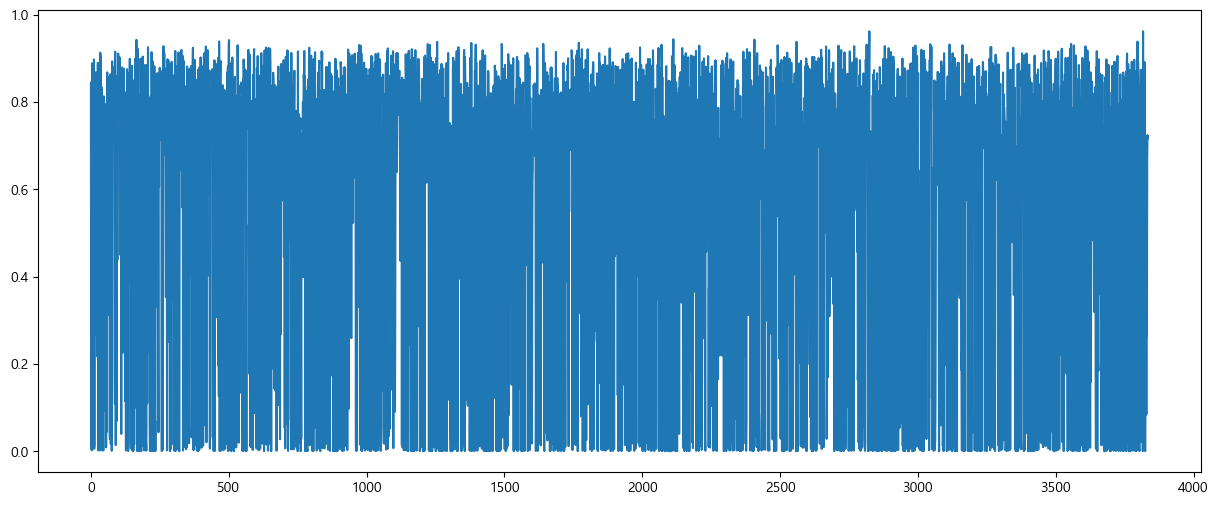

In [55]:
tmp = test_df.sort_values('Saturation')[:]
tmp = tmp.reset_index(drop=True)
plt.figure(figsize=(15,6))
tmp['score'].plot()

### 평균 표준편차를 기준으로 낮은 표준편차, 높은 표준편차로 나누기

In [100]:
tmp = dark_df.sort_values('sd').reset_index(drop=True)
tmp

,img_name,average,sd,score
0,val2017/000000477805.jpg,3.173,15.514,0.626568
1,val2017/000000474170.jpg,63.707,17.776,0.000604
2,val2017/000000079837.jpg,31.110,18.233,0.198885
3,val2017/000000415238.jpg,64.385,22.496,0.000400
4,val2017/000000430871.jpg,36.833,24.111,0.001346
...,...,...,...,...
234,val2017/000000316404.jpg,54.756,78.907,0.842632
235,val2017/000000277020.jpg,61.325,80.814,0.719089
236,val2017/000000113051.jpg,63.227,82.127,0.019490
237,val2017/000000334399.jpg,58.672,84.382,0.882239


In [117]:
# 'average' 열을 Min-Max 정규화
tmp['normalized_average'] = (tmp['average'] - tmp['average'].min()) / (tmp['average'].max() - tmp['average'].min())

# 'sd' 열을 Min-Max 정규화
tmp['normalized_sd'] = (tmp['sd'] - tmp['sd'].min()) / (tmp['sd'].max() - tmp['sd'].min())

<Axes: >

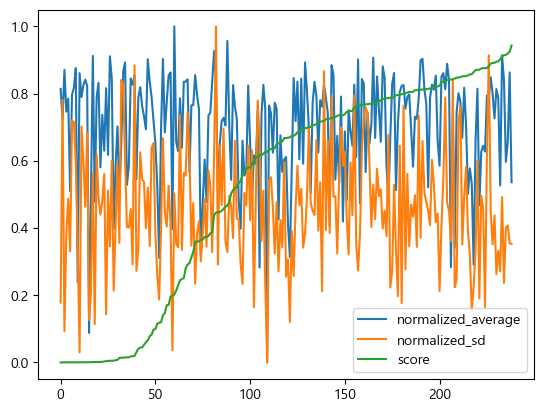

In [137]:
tmp[['normalized_average','normalized_sd','score']].sort_values('score').reset_index(drop=True).plot()

Text(0.5, 0, 'sd로 정렬')

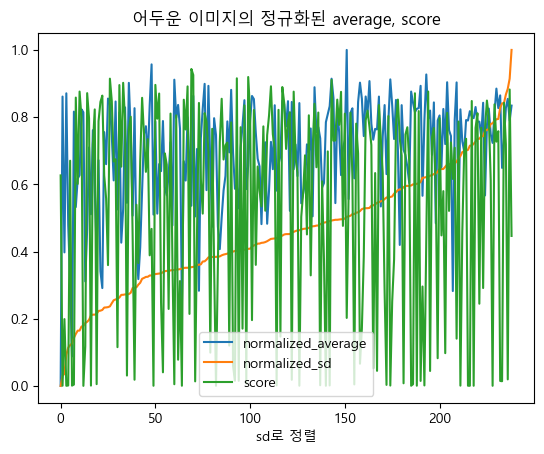

In [125]:
tmp[['normalized_average','normalized_sd','score']].plot()
plt.title('어두운 이미지의 정규화된 average, score')
plt.xlabel('sd로 정렬')

Text(0.5, 0, 'sd로 정렬, 이미지 120개')

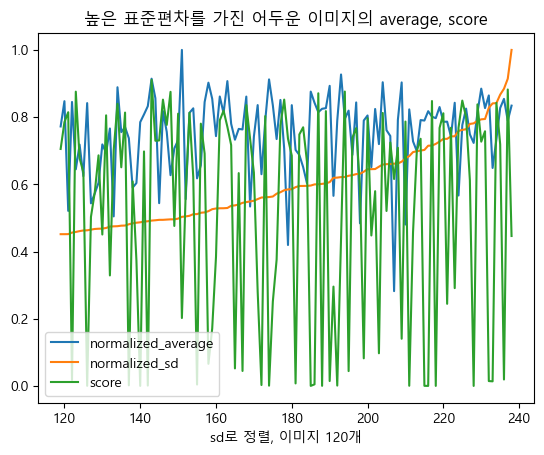

In [129]:
tmp[['normalized_average','normalized_sd','score']][119:].plot()
plt.title('높은 표준편차를 가진 어두운 이미지의 average, score')
plt.xlabel('sd로 정렬, 이미지 120개')

In [ ]:
tmp[['normalized_average','normalized_sd','score']].plot()


In [108]:
tmp[:119]

,img_name,average,sd,score
0,val2017/000000477805.jpg,3.173,15.514,0.626568
1,val2017/000000474170.jpg,63.707,17.776,0.000604
2,val2017/000000079837.jpg,31.110,18.233,0.198885
3,val2017/000000415238.jpg,64.385,22.496,0.000400
4,val2017/000000430871.jpg,36.833,24.111,0.001346
...,...,...,...,...
114,val2017/000000391648.jpg,44.024,48.627,0.001507
115,val2017/000000441553.jpg,49.488,48.904,0.821639
116,val2017/000000154339.jpg,51.304,49.114,0.146818
117,val2017/000000402118.jpg,62.825,49.196,0.889541


In [109]:
tmp[119:]

,img_name,average,sd,score
119,val2017/000000200421.jpg,57.460,49.543,0.705359
120,val2017/000000492758.jpg,62.744,49.544,0.785342
121,val2017/000000026690.jpg,39.803,49.556,0.814690
122,val2017/000000283037.jpg,62.582,49.898,0.018238
123,val2017/000000291619.jpg,48.499,50.042,0.875842
...,...,...,...,...
234,val2017/000000316404.jpg,54.756,78.907,0.842632
235,val2017/000000277020.jpg,61.325,80.814,0.719089
236,val2017/000000113051.jpg,63.227,82.127,0.019490
237,val2017/000000334399.jpg,58.672,84.382,0.882239


In [101]:
tmp.sd.describe()

count    239.000000
mean      50.168201
std       13.457957
min       15.514000
25%       41.481500
50%       49.543000
75%       59.484500
max       90.831000
Name: sd, dtype: float64

In [90]:
pd.DataFrame(tmp[:119].describe()).to_csv('describe2.csv')

In [91]:
tmp[:119].describe()

,average,sd,score
count,119.000000,119.000000,119.000000
mean,48.607118,39.495958,0.536449
std,12.777998,7.486206,0.326937
min,3.173000,15.514000,0.000178
25%,40.271000,34.987500,0.206588
50%,49.585000,41.474000,0.668674
75%,58.923500,45.261500,0.807987
max,70.439000,49.461000,0.943251


In [92]:
tmp[119:].describe()

,average,sd,score
count,120.000000,120.000000,120.000000
mean,56.079850,60.751508,0.514320
std,8.369379,8.934007,0.320889
min,23.021000,49.543000,0.000378
25%,52.491500,52.868500,0.194637
50%,58.448500,59.484500,0.659265
75%,61.724750,65.482750,0.777881
max,73.465000,90.831000,0.910881


In [ ]:
filtered_bright_sd = {}
filtered_dark_sd = {}

for item in filtered_bright:
    filtered_bright_sd[item] = dict(sd)[item]
for item in filtered_dark:
    filtered_dark_sd[item] = dict(sd)[item]

filtered_bright_sd = dict(sorted(filtered_bright_sd.items(), key=lambda item:item[1]))
filtered_dark_sd = dict(sorted(filtered_dark_sd.items(), key=lambda item:item[1]))

In [ ]:
b_low_sd, b_high_sd = seperation_by_sd(filtered_bright_sd)
d_low_sd, d_high_sd = seperation_by_sd(filtered_dark_sd)

TypeError: unhashable type: 'slice'

### 어두운 이미지 CLAHE 적용

In [ ]:
# 어두운 이미지의 인덱스 저장
dark_img_index = list(dark_df.index)

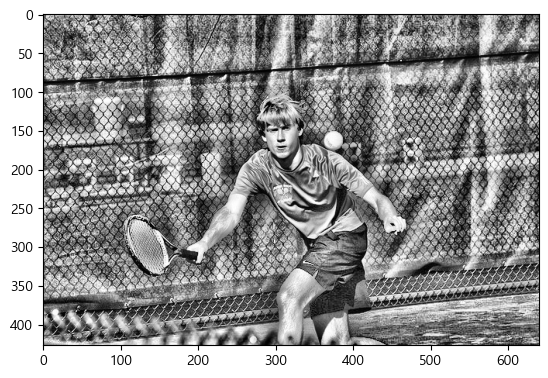

In [ ]:
image_path = 'output/000000237071.jpg'

img = cv2.imread(image_path)
plt.imshow(img)


In [ ]:
# # 어두운 이미지에 대해 CLAHE 적용
# from AHE import apply_ahe

# image_path = 'val2017/000000237071.jpg'
# output_folder = 'output/'

# for i in dark_img_index:
#     apply_ahe(i, output_folder, clip_limit=5.0, tile_grid_size=(16, 16))

In [ ]:
# JSON 파일 경로
json_file_path = 'result_keypoints_image_processing.json'

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    data = json.load(f)

print(f'개수: {len(data)}')

개수: 73464


In [ ]:
# val data 전체에 대한 score 불러오기
entire_score = find_id_list(dict(average), data)
# None 값 빼고 저장
# entire_score_Not_None = {key: value for key, value in entire_score.items() if value is not None}
entire_score_Not_None = {key: value for key, value in entire_score.items() if value is not None and value != 0}

In [ ]:
print("score 평균 :", round(np.mean(list(entire_score_Not_None.values())),4))

score 평균 : 0.5448


In [ ]:
len(entire_score_Not_None)

3835

In [ ]:
# 밝은 이미지/ 어두운 이미지에 대한 score 저장 
bright_score_totalID = find_id_list(filtered_bright, data)
dark_score_totalID = find_id_list(filtered_dark, data)

In [ ]:
# none값 아닌 거만 저장
# bright_score_before = {key: value for key, value in bright_score_totalID.items() if value is not None}
# dark_score_before = {key: value for key, value in dark_score_totalID.items() if value is not None}
bright_score_before = {key: value for key, value in bright_score_totalID.items() if value is not None and value !=0}
dark_score_before = {key: value for key, value in dark_score_totalID.items() if value is not None and value !=0}

In [ ]:
print("밝은 이미지 :", round(np.mean(list(bright_score_before.values())), 4))
print("어두운 이미지 :", round(np.mean(list(dark_score_before.values())),4))

밝은 이미지 : 0.6365
어두운 이미지 : 0.5059
